# TA Gucci

## Descrição do dataset

O dataset em questão trata de características de funcionários de uma empresa. Primeiramente vamos entender quais dados estão disponíveis, limpar o dataset e então partir para a análise. As colunas do dataset são:

* **employee_id**: ID do funcionário (indíce irrelevante para análise);
* **department**: departamento do funcionário;
* **region**: região de emprego;
* **education**: nível educacional;
* **gender**: gênero;
* **recruitment_channel**: canal de recrutamento;
* **no_of_trainings**: número de treinamentos completados;
* **age**: idade;
* **previous_year_rating**: avaliação do funcionário no ano anterior;
* **length_of_service**: duração do serviço (anos);
* **awards_won?**: se ganhou algum prêmio anteriormente (1 se sim, 0 se não);
* **avg_training_score**: pontuação média nas avaliações de treinamento atuais;
* **is_promoted**: recomendado ou não para promoção. **(nosso *target*)**.

## Começando do começo

Como sempre, vamos fazer uso das bibliotecas clássicas para análise de dados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
ds = pd.read_csv('train.csv') #leitura do dataset
ds.set_index("employee_id", inplace = True) #essa coluna não tem influência na análise, é apenas o inídice de cada funcionário

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       49962 non-null  float64
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    47350 non-null  float64
 11  is_promoted           54808 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 5.4+ MB


Como vemos acima, o dataset tem 54808 entradas, em algumas das categorias há dados faltantes, assim, teremos que lidar com isso. Além disso, vemos que há dados categóricos e numéricos, então dividiremos a análise em duas partes.

## Dados categóricos

Primeiramente vamos olhar por cima como estão os dados categóricos: 

In [4]:
ds.describe(include = ['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,10,35,3,5,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,35010,30446


Diretamente já enxergamos que há algo de errado (deveriam haver apenas 2 respostas diferentes para *gender*, e temos 5). Ademais, é importante olhar categoria por categoria para ver em quais categorias há respostas não cabíveis.

In [5]:
ds['department'].value_counts()

Sales & Marketing     16840
Operations            11348
Technology             7138
Procurement            7138
Analytics              5352
Finance                2536
HR                     2418
Legal                  1014
R&D                     999
quem trouxe quenga       25
Name: department, dtype: int64

In [6]:
ds['region'].value_counts()

region_2                12343
region_22                6428
region_7                 4843
region_15                2808
region_13                2648
region_26                2260
region_31                1935
region_4                 1703
region_27                1659
region_16                1465
region_28                1318
region_11                1315
region_23                1175
region_29                 994
region_32                 945
region_19                 874
region_20                 850
region_14                 827
region_25                 819
region_17                 796
region_5                  766
region_6                  690
region_30                 657
region_8                  655
region_10                 648
region_1                  610
region_24                 508
region_12                 500
region_9                  420
region_21                 411
region_3                  346
region_34                 288
region_33                 269
region_18 

In [7]:
ds['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [8]:
ds['gender'].value_counts()

m                                   35010
f                                   15739
MALE                                 3262
fEMALE                                573
eu sou homem hetero homossexual!      224
Name: gender, dtype: int64

In [9]:
ds['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

### Limpeza dos dados (categóricos)

Na coluna *department* vemos 25 respostas como "quem trouxe quenga", o que não parece fazer sentido dentro do contexto. Assim, por ser um número pequeno, vamos simplesmente apagar esses valores.

In [10]:
ds.drop(ds[ds['department'] == 'quem trouxe quenga'].index, inplace = True)

Na coluna *region* temos o mesmo problema, agora havendo apenas 4 respostas como "casa da lu na suecia". Faremos o mesmo.

In [11]:
ds.drop(ds[ds['region'] == 'casa da lu na suecia'].index, inplace = True)

Na coluna *education* parece estar tudo certo, então não precisamos fazer nada.

Na coluna *gender* vemos que há 3 categorias pra "male" e duas para "female" ao invés de apenas uma para cada. Vamos corrigir isso agrupando as categorias adequadamente. 

In [12]:
ds['gender'].replace('f', 'female', inplace = True)
ds['gender'].replace('fEMALE', 'female', inplace = True)
ds['gender'].replace('m', 'male', inplace = True)
ds['gender'].replace('MALE', 'male', inplace = True)
ds['gender'].replace('eu sou homem hetero homossexual!', 'male', inplace = True)

Na coluna *recruitment_channel*, assim como *region*, parece estar tudo de acordo.

Agora voltamos para as categorias que precisamos fazer modificações e verificamos que está tudo em conformidade com o esperado.

In [13]:
ds['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2414
Legal                 1014
R&D                    999
Name: department, dtype: int64

In [14]:
ds['region'].value_counts()

region_2     12334
region_22     6423
region_7      4838
region_15     2808
region_13     2648
region_26     2260
region_31     1933
region_4      1703
region_27     1657
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       654
region_10      648
region_1       610
region_24      508
region_12      499
region_9       420
region_21      411
region_3       346
region_34      288
region_33      269
region_18       31
Name: region, dtype: int64

In [15]:
ds['gender'].value_counts()

male      38470
female    16309
Name: gender, dtype: int64

### Analisando os dados (categóricos)

Agora com o dataset já pronto, podemos partir para a análise. Vamos entender melhor cada uma das *features* por sí mesmas e então observar se estas se correlacionam. Esses primeiros gráficos vão mostrar informações que poderiam ter sido vistas já anteriormente no método *value_counts()* do *pandas*, mas são mais digeríveis em forma gráfica.

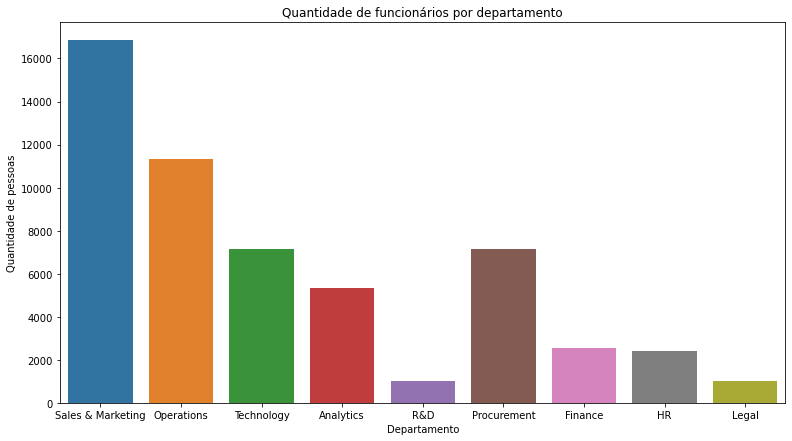

In [16]:
plt.figure(figsize=(13,7))

sns.countplot(x="department", data=ds)

plt.title("Quantidade de funcionários por departamento")
plt.xlabel("Departamento")
plt.ylabel("Quantidade de pessoas")
plt.show()

Vemos aqui que a maioria dos funcionários dessa empresa se encontram em *Sales & Marketing* e *operations*, havendo uma boa distribuição entre os dedmais departamentos.

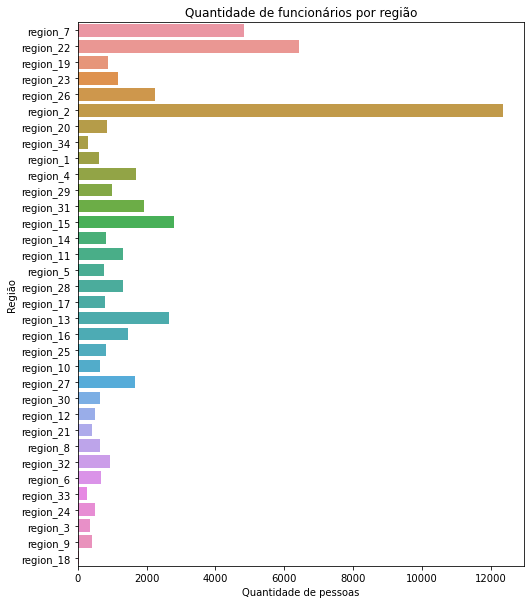

In [17]:
plt.figure(figsize=(8,10))

sns.countplot(y="region", data=ds)

plt.title("Quantidade de funcionários por região")
plt.xlabel("Quantidade de pessoas")
plt.ylabel("Região")
plt.show()

Podemos ver acima que a grande maioria das pessoas trabalha na *region* 2

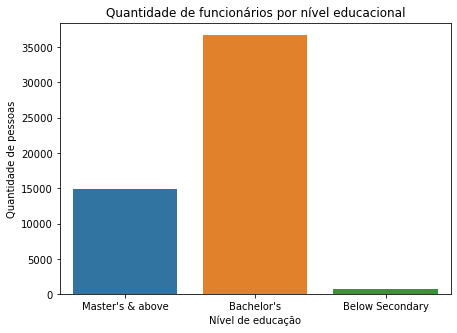

In [18]:
plt.figure(figsize=(7,5))

sns.countplot(x="education", data=ds)

plt.title("Quantidade de funcionários por nível educacional")
plt.xlabel("Nível de educação")
plt.ylabel("Quantidade de pessoas")
plt.show()

Acima observamos que a grande maioria dos funcionários são bacharéis e uma quantidade expressiva tem mestrado ou nível superior. Pouquíssimos funcionários (relativamente) tem nível educacional inferior aos referidos.

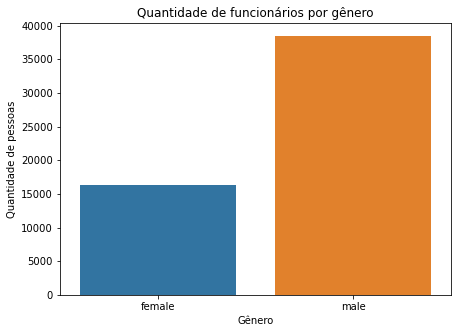

In [19]:
plt.figure(figsize=(7,5))

sns.countplot(x="gender", data=ds)

plt.title("Quantidade de funcionários por gênero")
plt.xlabel("Gênero")
plt.ylabel("Quantidade de pessoas")
plt.show()

Vemos aqui que há mais do que o dobro de homens do que mulheres na empresa.

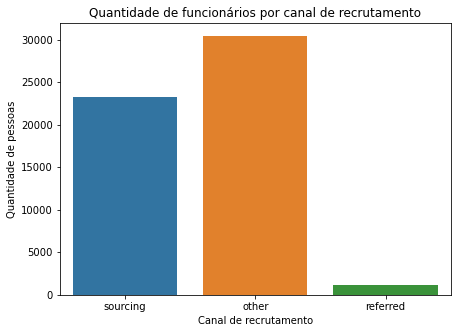

In [20]:
plt.figure(figsize=(7,5))

sns.countplot(x="recruitment_channel", data=ds)

plt.title("Quantidade de funcionários por canal de recrutamento")
plt.xlabel("Canal de recrutamento")
plt.ylabel("Quantidade de pessoas")
plt.show()

Acima vemos que a esmagadora maioria dos funcionários **não** vieram por meio de *referred*.

Antes de começar a analisar como as *features* se relacionam entre sí para então ver como essas tem influência (ou não) sobre o *target*, vamos analisar os dados númericos - assim podemos relacionar dados numéricos e categóricos conjuntamente.

## Dados numéricos

Novamente, vamos observar o parecer inicial das *features* numéricas:

In [21]:
ds.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,49935.000000,54779.000000,50659.000000,54779.000000,54779.000000,47324.000000,54779.000000
mean,1.256574,273.647383,3.329339,5.866500,0.022709,63.514876,0.085087
std,0.612822,5423.996136,1.260037,4.265647,0.148977,13.492592,0.279014
min,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Assim como fizemos com os dados categóricos, podemos de cara já observar problemas com os dados numéricos. Temos valores descabíveis para *age* (observando seu valor de *max* e *min*) e, além disso, temos muitos dados faltantes para *no_of_trainings*, *previous_year_rating* e *avg_training_score* (como pode ser visto no seu count, sabendo que há um total de 54808 entradas). Ademais, as outras *features* parecem estar *ok*. 
Logo, vamos à seguir fazer algo para reconstituir o dataset e então tentar entender melhor as *features*.

### Limpeza e análise dos dados (numéricos)

Primeiro vamos arrumar a coluna *age*:

In [22]:
ds['age'].value_counts()

 30        3664
 32        3533
 31        3529
 29        3404
 33        3210
 28        3146
 34        3076
 27        2824
 35        2708
 36        2516
 37        2163
 26        2044
 38        1922
 39        1695
 40        1663
 41        1288
 25        1271
 42        1149
 43         992
 44         847
 24         821
 45         760
 46         696
 48         557
 47         557
 50         520
 49         441
 23         403
 51         389
 53         364
 52         350
 54         312
 55         293
 56         264
 57         238
 22         218
 60         217
 58         213
 59         208
 20         112
 123456     106
 21          93
-32           3
Name: age, dtype: int64

Como podemos ver acima, há dois problemas: 106 respostas com o valor *123456* e 3 respostas com o valor *-32*. Como são poucos dados (apenas 109 dentre mais de 50 mil), vamos então simplesmente substituir os valores desapropriados pela moda (no caso *30* anos).

In [23]:
ds['age'].replace(123456, 30, inplace = True)
ds['age'].replace(-32, 30, inplace = True)

Agora com a coluna *age* arrumada, vamos analisá-la:

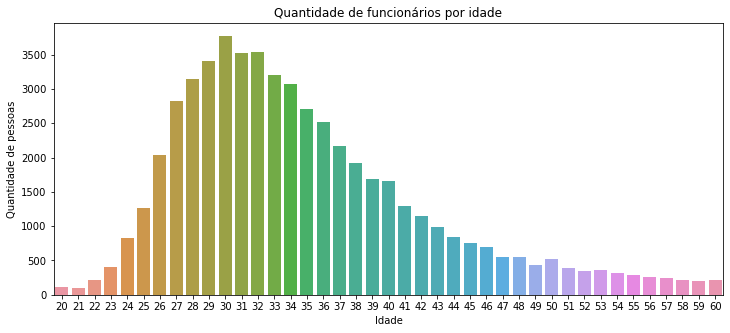

In [24]:
plt.figure(figsize=(12,5))

sns.countplot(x="age", data=ds)

plt.title("Quantidade de funcionários por idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade de pessoas")
plt.show()

Observa-se acima uma distribuição equilibrada com uma causa acentuada à esquerda e leve à direita, os funcionários se concentram na faixa entre 27 e 37 anos.

Agora devemos tratar de preencher os dados faltantes para *no_of_trainings*, *previous_year_rating* e *avg_training_score*. Primeiro vamos analisar sua distribuição para melhor compreender qual seria a melhor forma de recompor os valores ausentes.

In [25]:
ds['no_of_trainings'].value_counts()

1.0     40319
2.0      7338
3.0      1656
4.0       438
5.0       121
6.0        40
7.0        10
9.0         5
8.0         4
10.0        4
Name: no_of_trainings, dtype: int64

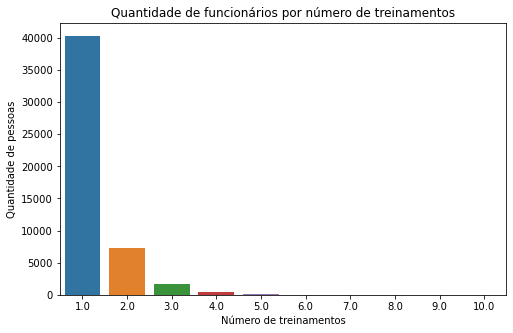

In [26]:
plt.figure(figsize=(8,5))

sns.countplot(x="no_of_trainings", data=ds)

plt.title("Quantidade de funcionários por número de treinamentos")
plt.xlabel("Número de treinamentos")
plt.ylabel("Quantidade de pessoas")
plt.show()

Como podemos ver na contagem de dados, e de forma mais clara no gráfico acima, a grande maioria dos funcionários (mais de 80%) da empresa tem apenas um treinamento completo. Assim, podemos preencher os dados faltantes por este valor, o que não deve afetar incisivamente a análise da *feature*.

In [27]:
ds['no_of_trainings'].fillna(1, inplace = True)

Agora vamos olhar para a *feature* *previous_year_rating*:

In [28]:
ds['previous_year_rating'].value_counts()

3.0    18609
5.0    11737
4.0     9872
1.0     6221
2.0     4220
Name: previous_year_rating, dtype: int64

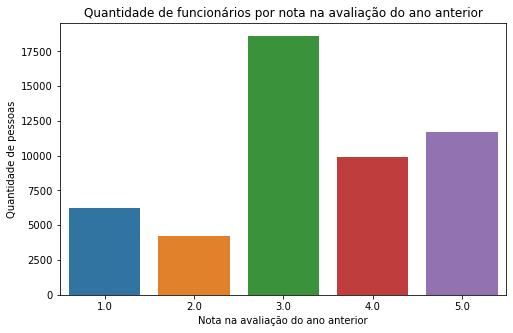

In [29]:
plt.figure(figsize=(8,5))

sns.countplot(x="previous_year_rating", data=ds)

plt.title("Quantidade de funcionários por nota na avaliação do ano anterior")
plt.xlabel("Nota na avaliação do ano anterior")
plt.ylabel("Quantidade de pessoas")
plt.show()

Olhando a contagem de dados e o gráfico acima, vemos uma distribuição que volta em torno do valor *3*, mas vários funcionários conseguindo notas maiores, e alguns (ainda numerosos mas menos) com notas menores que *3*. Assim, parece razoável substituir os dados faltantes pela moda, o que não afeta muito a distribuição da *feature*.

In [30]:
ds['previous_year_rating'].fillna(ds['previous_year_rating'].median(), inplace = True)

Agora, atenderemos a *feature* *avg_training_score*:

In [31]:
ds['avg_training_score'].value_counts()

50.0    2365
49.0    2279
48.0    2144
51.0    2030
60.0    1831
        ... 
98.0      34
99.0      30
41.0      22
40.0       3
39.0       2
Name: avg_training_score, Length: 61, dtype: int64

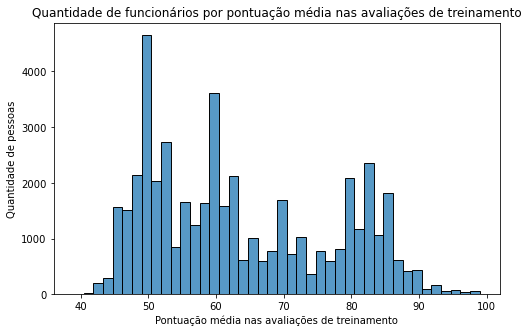

In [32]:
plt.figure(figsize=(8,5))

sns.histplot(x="avg_training_score", data=ds)

plt.title("Quantidade de funcionários por pontuação média nas avaliações de treinamento")
plt.xlabel("Pontuação média nas avaliações de treinamento")
plt.ylabel("Quantidade de pessoas")
plt.show()

Vemos acima uma distribuição bastante diversa, com poucos funcionários atingindo acima de 90 ou menos de 45 nas avaliações de treinamento. Vamos então reconstituir o dataset com o valor da mediana.

In [33]:
ds['avg_training_score'].fillna(ds['avg_training_score'].median(), inplace = True)

Vamos então olhar para coluna *length_of_service*:

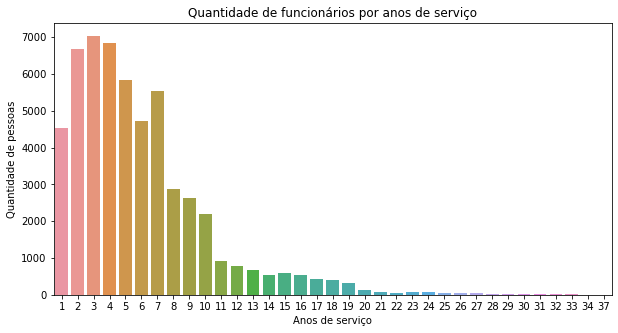

In [34]:
plt.figure(figsize=(10,5))

sns.countplot(x="length_of_service", data=ds)

plt.title("Quantidade de funcionários por anos de serviço")
plt.xlabel("Anos de serviço")
plt.ylabel("Quantidade de pessoas")
plt.show()

Vemos acima que os funcionários tem normalmente poucos anos de serviço, sua grande maioria com 7 ou menos anos. Entretando a cauda se extende bastante, havendo funcionários com até 37 anos.

Por último, vamos olhar para *awards_won?*:

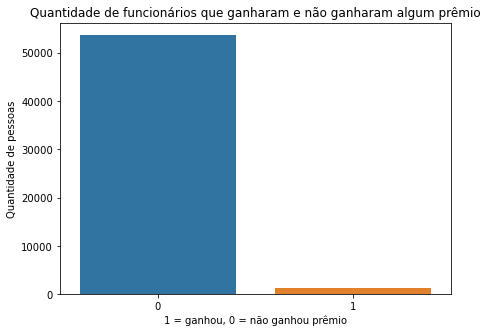

In [35]:
plt.figure(figsize=(7,5))

sns.countplot(x="awards_won?", data=ds)

plt.title("Quantidade de funcionários que ganharam e não ganharam algum prêmio")
plt.xlabel("1 = ganhou, 0 = não ganhou prêmio")
plt.ylabel("Quantidade de pessoas")
plt.show()

Como podemos ver, a grande maioria dos funcionários não ganhou nenhum prêmio. 

Logo, podemos seguir. Agora faremos uma análise entre as possíveis correlações entre as *features* entre si e o *target*.

### Analisando a relação entre as features entre sí e o *target*

Primeiramente vamos olhar diretamente para o *target*.

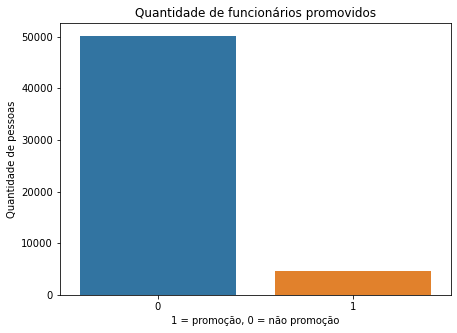

In [36]:
plt.figure(figsize=(7,5))

sns.countplot(x="is_promoted", data=ds)

plt.title("Quantidade de funcionários promovidos")
plt.xlabel("1 = promoção, 0 = não promoção")
plt.ylabel("Quantidade de pessoas")
plt.show()

Vemos acima que a grande maioria dos funcionários da empresa não receberam promoção.

Agora, fazendo uso de um *heatmap*, conseguimos ver diretamente quais das *features* (numéricas) tem maior impacto sobre o *target*.

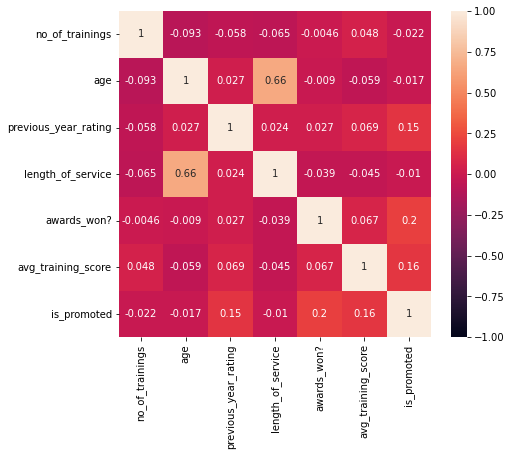

In [37]:
plt.figure(figsize=(7,6))

sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1)

plt.show()

Vemos acima que as *features* (numéricas) com maiores indíces de relação com o *target* são *previous_year_rating*, *awards_won?* e *avg_training_score*. Isso não significa que as demais *features* são dispensáveis, devemos nos atentar a elas também. Ademais, também precisamos olhar para as *features* categóricas.

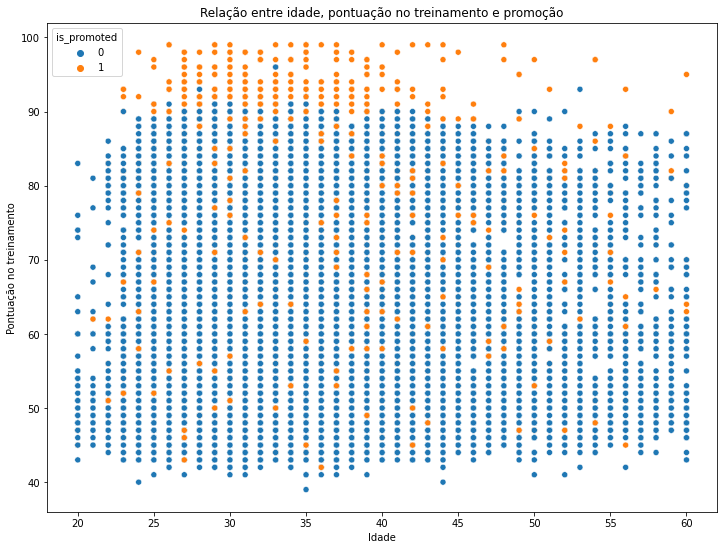

In [38]:
plt.figure(figsize=(12,9))

#pegando apenas 50% do dataset para poluir menos
sample_size = int(54808 * 0.5)
ds2 = ds.sample(sample_size, random_state=420) 

sns.scatterplot(x="age", y="avg_training_score", hue="is_promoted", data=ds2)

plt.title("Relação entre idade, pontuação no treinamento e promoção")
plt.xlabel("Idade")
plt.ylabel("Pontuação no treinamento")
plt.show()

Assim como o heatmap indicou, podemos ver claramente que funcionários com maior pontuação no treinamento resultam em mais promoções. Ademais, com o gráfico acima podemos enxergar que na faixa de idade de cerca de 25-45 anos é onde se tem mais promoções (sim, é nesta faixa que há mais pessoas em números absolutos, mas podemos ver que comparativamente é também nesta idade que há mais promoções).

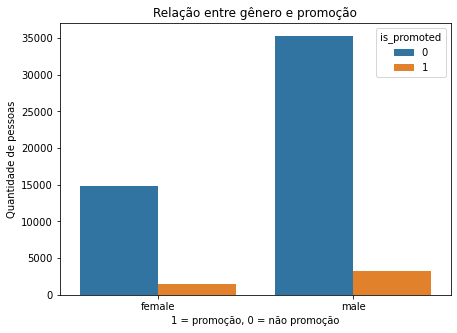

In [39]:
plt.figure(figsize=(7,5))

sns.countplot(x="gender", hue="is_promoted", data=ds) 

plt.title("Relação entre gênero e promoção")
plt.xlabel("1 = promoção, 0 = não promoção")
plt.ylabel("Quantidade de pessoas")
plt.show()

Como vemos acima, o número absoluto de homens é maior, mas isso não afeta na proporção de promoções, que é praticamente a mesma para homens e mulheres.

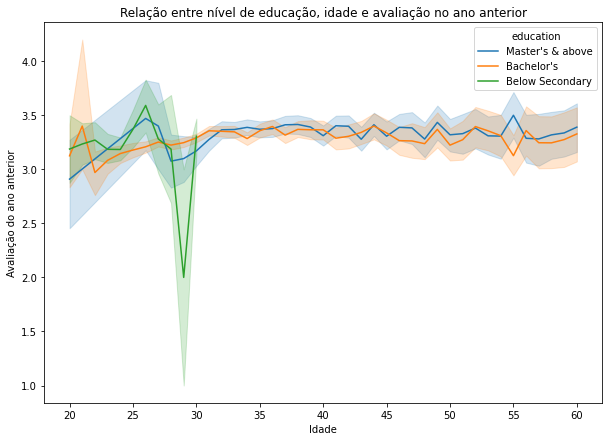

In [40]:
plt.figure(figsize=(10,7))

sns.lineplot(x="age", y="previous_year_rating", hue="education", data=ds)

plt.title("Relação entre nível de educação, idade e avaliação no ano anterior")
plt.xlabel("Idade")
plt.ylabel("Avaliação do ano anterior")
plt.show()

Vemos acima o nível educacional dos funcionários pouco afeta a avaliação que receberam no ano anterior. O único ponto que dista da tendência deve ser um outliar que se pronuncia aqui pois há poucos indivíduos com nível baixo de educação (*Below Secondary*) em idade mais avançada

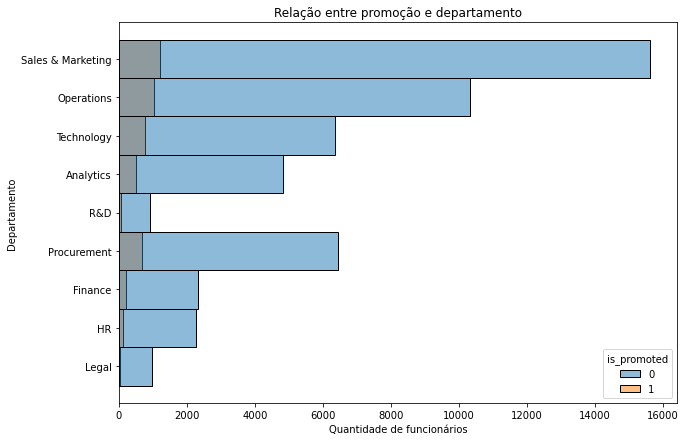

In [41]:
plt.figure(figsize=(10,7))
sns.histplot(ds, y="department", hue="is_promoted", element="bars")
plt.title("Relação entre promoção e departamento")
plt.xlabel("Quantidade de funcionários")
plt.ylabel("Departamento")
plt.show()

Vemos acima que todos os departamentos tem uma chance parecida de receber promoção, mas olhando mais rigorosamente aos dados, talvez possamos ver mais concretamente as diferenças, que possam não ser irrelevantes. 

In [42]:
#Olhando por cima, podemos estimar que os departamentos com maior proporção de promoções seriam Technology e Analytcs.
#Ademais, aqueles que parecem ter a menor proporção são legal e RH

print("Proporção de promoções por departamento:")

ds_temp = pd.merge(ds[ds['department'] == 'Technology'], ds[ds['is_promoted'] == 1])
print("Technology", format((len(ds_temp) / len(ds[ds['department'] == 'Technology'])), ".3f"))

ds_temp = pd.merge(ds[ds['department'] == 'Analytics'], ds[ds['is_promoted'] == 1])
print("Analytics", format((len(ds_temp) / len(ds[ds['department'] == 'Analytics'])), ".3f"))

ds_temp = pd.merge(ds[ds['department'] == 'HR'], ds[ds['is_promoted'] == 1])
print("HR", format((len(ds_temp) / len(ds[ds['department'] == 'HR'])), ".3f"))

ds_temp = pd.merge(ds[ds['department'] == 'Legal'], ds[ds['is_promoted'] == 1])
print("Legal", format((len(ds_temp) / len(ds[ds['department'] == 'Legal'])), ".3f"))

Proporção de promoções por departamento:
Technology 0.108
Analytics 0.096
HR 0.056
Legal 0.045


Como podemos ver, existe sim uma discrepância nas promoções para os departamentos, há mais que o dobro de promovidos no setor de tecnologia que no setor legal.

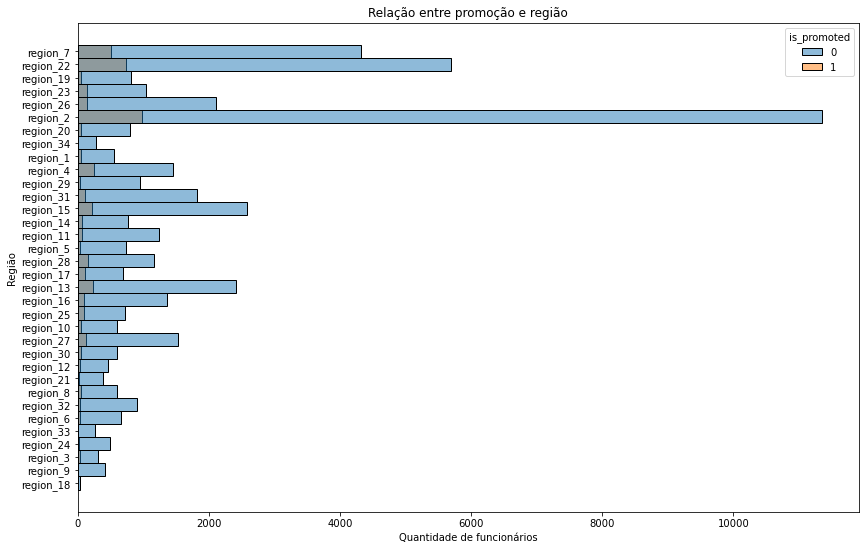

In [43]:
plt.figure(figsize=(14,9))
sns.histplot(ds, y="region", hue="is_promoted", element="bars")
plt.title("Relação entre promoção e região")
plt.xlabel("Quantidade de funcionários")
plt.ylabel("Região")
plt.show()

In [44]:
print("Proporções de promoção: ")
my_max = my_mean = 0
my_min = 100

for i in range(1, 35):
    ds_temp = pd.merge(ds[ds['region'] == 'region_' + str(i)], ds[ds['is_promoted'] == 1])
    proportion = (len(ds_temp) / len(ds[ds['region'] == 'region_' + str(i)]))
    if proportion > my_max:
        my_max = proportion
    if proportion < my_min:
        my_min = proportion
    my_mean = (my_mean*(i-1) + proportion)/i
    
print("máximo: ", format(my_max, ".3f"))
print("mínimo: ", format(my_min, ".3f"))
print("média : ", format(my_mean, ".3f"))

Proporções de promoção: 
máximo:  0.144
mínimo:  0.019
média :  0.074


Podemos averiguar que há diferença na proporção de promoções entre as regiões.

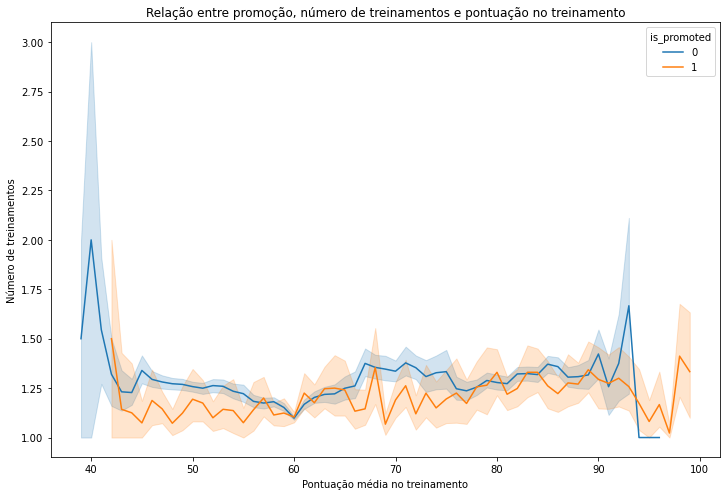

In [45]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = ds, y = 'no_of_trainings', x = 'avg_training_score', hue = 'is_promoted')
plt.title("Relação entre promoção, número de treinamentos e pontuação no treinamento")
plt.xlabel("Pontuação média no treinamento")
plt.ylabel("Número de treinamentos")
plt.show()

Vemos acima que um maior número de treinamentos não implica diretamente uma maior média na avaliação. Entretanto, podemos ver que os que foram promovidos, o fizeram precisando menos treinamentos (dado que pode ser interpretado como uma maior sagacidade desses funcionários).

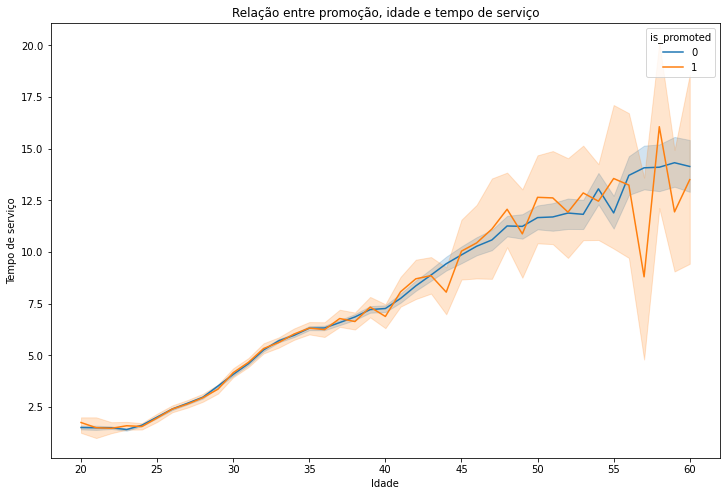

In [46]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = ds, y = 'length_of_service', x = 'age', hue = 'is_promoted')
plt.title("Relação entre promoção, idade e tempo de serviço")
plt.xlabel("Idade")
plt.ylabel("Tempo de serviço")
plt.show()

Como é de se esperar, vemos uma relação direta entre idade e tempo de serviço. Ademais, falha-se ao procurar uma correlação entre promoção e o tempo de serviço.

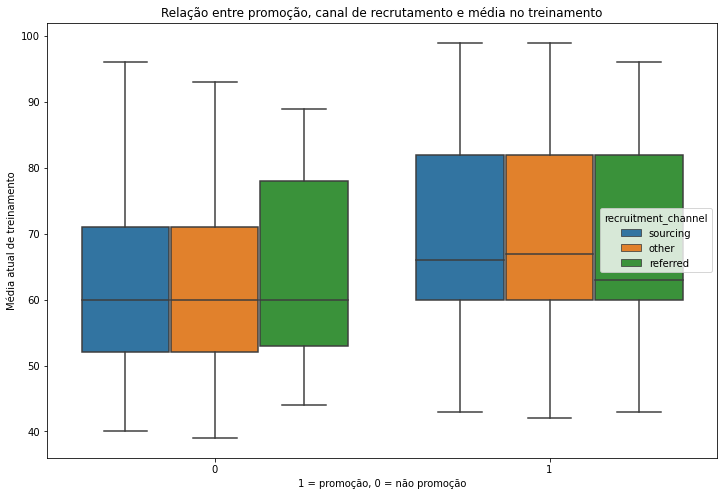

In [47]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = ds, y = 'avg_training_score', x = 'is_promoted', hue = 'recruitment_channel')
plt.title("Relação entre promoção, canal de recrutamento e média no treinamento")
plt.xlabel("1 = promoção, 0 = não promoção")
plt.ylabel("Média atual de treinamento")
plt.show()

Novamente, vemos acima a relação direta entre média no treinamento e promoções. Ademais, vemos que os referidos tem as maiores médias no treinamento, o que acarreta levemente em mais promoções, mas estes são numericamente muito poucos em relação a totalidade para sugerir causalidade.

## Concluindo...

Com a analise das *features* que formam nosso dataset pudemos averiguar quais são os atributos que tem influência sobre o *target*. Sobretudo, no momento em da predição, poderemos desconsiderar as *features* que nos pareceram ter dispensáveis efeitos sobre a promoção de um funcionário, são elas: *education*, *length_of_service* e *recruitment_channel*. Ademais, iremos considerar as demais propriedades para o modelo de predição.

## Preparando para predição

Assim como fizemos para a análise, devemos primeiro limpar o dataset de treino para poder então seguirmos.

In [48]:
dt = pd.read_csv('test.csv')
dt.set_index("employee_id", inplace = True)

In [49]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 8724 to 5973
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       21417 non-null  float64
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   awards_won?           23490 non-null  int64  
 10  avg_training_score    23490 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.2+ MB


Com 23490 entradas, temos alguns dados faltantes nas *features* *education*, *no_of_trainings* e *previous_year_rating*, o que vamos atender. Ademais, precisamos limpar o dataset de entradas incompatíveis.

In [50]:
dt['department'].value_counts()

Sales & Marketing     7315
Operations            4764
Procurement           3020
Technology            3011
Analytics             2319
Finance               1091
HR                    1085
R&D                    440
Legal                  438
quem trouxe quenga       7
Name: department, dtype: int64

In [51]:
dt.drop(dt[dt['department'] == 'quem trouxe quenga'].index, inplace = True)

In [52]:
dt['region'].value_counts()

region_2                5297
region_22               2737
region_7                1982
region_13               1166
region_15               1130
region_26               1011
region_31                842
region_4                 775
region_27                710
region_28                595
region_16                590
region_11                571
region_23                516
region_32                433
region_29                414
region_19                410
region_17                361
region_14                350
region_5                 342
region_25                337
region_20                326
region_6                 298
region_30                273
region_8                 269
region_10                269
region_1                 238
region_24                219
region_12                215
region_9                 180
region_21                179
region_34                153
region_3                 147
region_33                126
region_18                 20
casa da lu na 

In [53]:
dt.drop(dt[dt['region'] == 'casa da lu na suecia'].index, inplace = True)

In [54]:
dt['education'].value_counts()

Bachelor's          15571
Master's & above     6502
Below Secondary       374
Name: education, dtype: int64

In [55]:
dt['education'].fillna("Bachelor's", inplace = True)

In [56]:
dt['gender'].value_counts()

m         15214
f          6645
MALE       1374
fEMALE      248
Name: gender, dtype: int64

In [57]:
dt['gender'].replace('f', 'female', inplace = True)
dt['gender'].replace('fEMALE', 'female', inplace = True)
dt['gender'].replace('m', 'male', inplace = True)
dt['gender'].replace('MALE', 'male', inplace = True)

In [58]:
dt['recruitment_channel'].value_counts()

other       13074
sourcing     9957
referred      450
Name: recruitment_channel, dtype: int64

In [59]:
dt['no_of_trainings'].value_counts()

1.0    17206
2.0     3269
3.0      686
4.0      178
5.0       35
6.0       23
7.0        9
9.0        2
8.0        1
Name: no_of_trainings, dtype: int64

In [60]:
dt['no_of_trainings'].fillna(1, inplace = True)

In [61]:
print(pd.Series(dt.age.unique()))

0     24
1     31
2     30
3     36
4     33
5     51
6     29
7     40
8     34
9     37
10    26
11    49
12    27
13    25
14    41
15    52
16    43
17    35
18    42
19    57
20    46
21    21
22    32
23    28
24    38
25    23
26    58
27    54
28    44
29    48
30    45
31    39
32    59
33    53
34    56
35    47
36    22
37    20
38    50
39    55
40    60
dtype: int64


In [62]:
dt['previous_year_rating'].value_counts()

3.0    7918
5.0    5095
4.0    4247
1.0    2678
2.0    1731
Name: previous_year_rating, dtype: int64

In [63]:
dt['previous_year_rating'].fillna(3, inplace = True)

In [64]:
dt['length_of_service'].value_counts()

3     3031
4     2910
2     2868
5     2592
7     2342
6     2037
1     1992
8     1262
9     1070
10     941
11     352
12     328
13     271
14     261
15     240
16     212
17     204
18     166
19     142
20      62
23      31
21      29
22      27
25      24
24      18
27      16
26      14
28      12
29      10
31       7
30       6
34       2
33       1
32       1
Name: length_of_service, dtype: int64

In [65]:
dt['awards_won?'].value_counts()

0    22953
1      528
Name: awards_won?, dtype: int64

In [66]:
print(pd.Series(dt.avg_training_score.unique()))

0     77
1     51
2     47
3     65
4     61
      ..
56    99
57    42
58    41
59    40
60    39
Length: 61, dtype: int64


Agora, com o dataset pronto, vamos analisar qual modelo de predição é o mais adequado.

## Modelos de predição

Testaremos 4 diferentes modelos aqui: Regressão Logística, Random Forest, KNN e Naive Bayes, e então veremos qual o que melhor se encaixa para o nosso caso. Entretanto, antes de propriamente começar, temos que fazer duas coisas: separar o dataset em treino e teste e criar variáveis *dummy* para os dados categóricos.

In [67]:
#tiramos do ds as features que julgamos não ter influência sobre o target
X_ds = ds.drop(columns = ['education', 'length_of_service', 'recruitment_channel', 'is_promoted'])
y_ds = ds['is_promoted']

In [68]:
X_ds_ok = pd.get_dummies(X_ds) #one-hot-encoding
X_ds_ok

,no_of_trainings,age,previous_year_rating,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_female,gender_male
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,1.0,35,5.0,0,49.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
65141,1.0,30,5.0,0,60.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7513,1.0,34,3.0,0,50.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2542,2.0,39,1.0,0,50.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48945,1.0,45,3.0,0,73.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1.0,48,3.0,0,60.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
74592,1.0,37,2.0,0,56.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
13918,1.0,27,5.0,0,79.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Um detalhe é que ao criarmos as variáveis *dummies*, para *features* com apenas duas categorias, apenas uma delas é necessária, como é o caso de *gender*, assim, vamos excluir uma das colunas.

In [69]:
X_ds_ok.drop(columns  = ['gender_male'], inplace = True)

Agora fazemos o mesmo nos dados em que aplicaremos o modelo.

In [70]:
X_dt = dt.drop(columns = ['education', 'length_of_service', 'recruitment_channel'])

In [71]:
X_dt_ok = pd.get_dummies(X_dt)
X_dt_ok.drop(columns  = ['gender_male'], inplace = True)

Separando o dataset em dados de treino e teste:

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_ds_ok, y_ds, random_state=0,test_size=0.2)

Para avaliar os modelos e, assim, conseguir determinar a melhor escolha, vamos utilizar algumas métricas de performance.

In [74]:
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, accuracy_score

### Regressão Logística

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
log_reg = LogisticRegression(max_iter=2000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [77]:
y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

In [78]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9971
           1       0.91      0.16      0.27       985

    accuracy                           0.92     10956
   macro avg       0.92      0.58      0.61     10956
weighted avg       0.92      0.92      0.90     10956



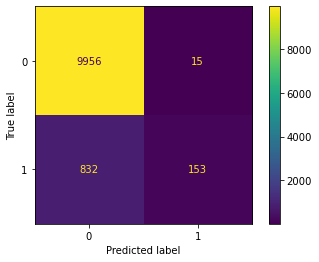

In [79]:
plot_confusion_matrix(log_reg, X_test, y_test, values_format='d')
plt.show()

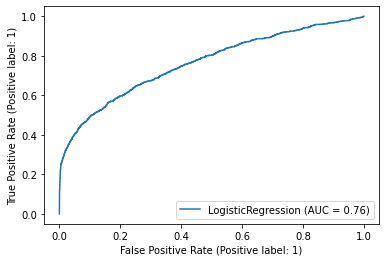

In [80]:
plot_roc_curve(log_reg, X_test, y_test)
plt.show()

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

In [83]:
rf_y_train_predict = rf.predict(X_train)
rf_y_test_predict = rf.predict(X_test)

In [84]:
print(classification_report(y_test, rf_y_test_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9971
           1       0.96      0.23      0.37       985

    accuracy                           0.93     10956
   macro avg       0.94      0.61      0.67     10956
weighted avg       0.93      0.93      0.91     10956



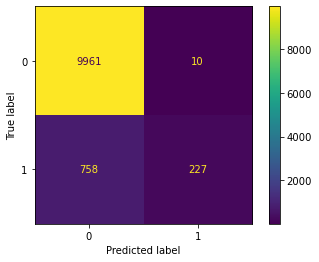

In [85]:
plot_confusion_matrix(rf, X_test, y_test, values_format='d')
plt.show()

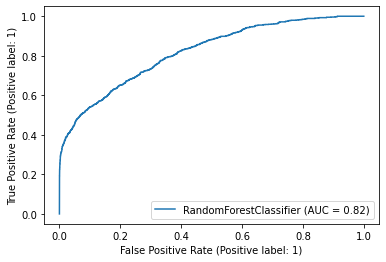

In [86]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
K = 5
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X_train, y_train)
knn_y_predict = model.predict(X_test)
print(knn_y_predict)

[0 0 0 ... 0 0 0]


In [89]:
k_range = range(2, 15)
scores = {}
scores_list = []
for k in k_range:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train, y_train)
  knn_y_predict = model.predict(X_test)
  scores[k] = accuracy_score(y_test, knn_y_predict)
  scores_list.append(accuracy_score(y_test, knn_y_predict))

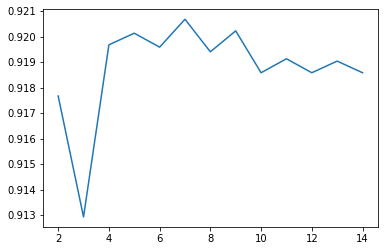

In [90]:
plt.figure
plt.plot(k_range, scores_list)

Vemos que o melhor K encontrado foi K = 7

In [91]:
knn = KNeighborsClassifier(7)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [92]:
knn_y_train_predict = knn.predict(X_train)
knn_y_test_predict = knn.predict(X_test)

In [93]:
print(classification_report(y_test, knn_y_test_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9971
           1       0.88      0.14      0.24       985

    accuracy                           0.92     10956
   macro avg       0.90      0.57      0.60     10956
weighted avg       0.92      0.92      0.89     10956



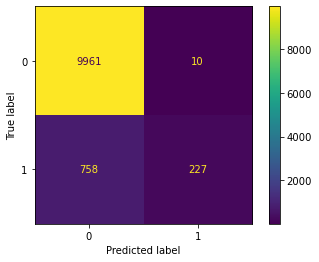

In [94]:
plot_confusion_matrix(rf, X_test, y_test, values_format='d')
plt.show()

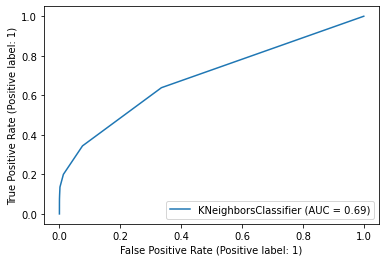

In [95]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

### Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB

In [97]:
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [98]:
nb_y_test_predict = nb.predict(X_test)

In [99]:
print(classification_report(y_test, nb_y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.49      0.65      9971
           1       0.13      0.75      0.22       985

    accuracy                           0.51     10956
   macro avg       0.54      0.62      0.43     10956
weighted avg       0.88      0.51      0.61     10956



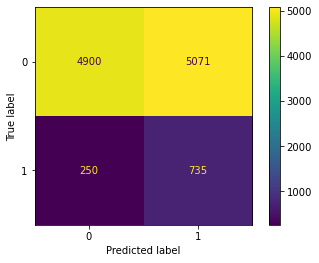

In [100]:
plot_confusion_matrix(nb, X_test, y_test, values_format='d')
plt.show()

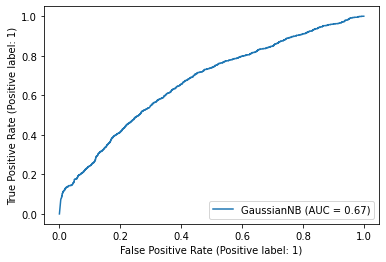

In [101]:
plot_roc_curve(nb, X_test, y_test)
plt.show()

## Finalmentes

Agora tendo os 4 modelos candidatos, basta olhar para seus resultados e escolher o melhor modelo a ser aplicado. 

Primeiramente, vemos de cara que o Naive Bayes se saiu muito mal, tendo uma acurácia comparável a de uma moeda, então vamos desconsiderá-lo desde já. Ademais, olhando para os outros modelos, vemos valores para precisão, acurácia, recall e f1, todos muito próximos entre sí (acurácia e precisão com 92%, recall 100% e f1-score 96%). Até aí, qualquer um desses modelos poderia ser escolhido. Por último, nos atentamos a curva ROC, que sumariza as inúmeras possíveis matrizes de confusão: nota-se que a AUC do modelo Random Forest é o maior (0.82, segundo a segunda maior 0.76), assim, este será nosso modelo escolhido.

In [102]:
y_is_promoted = rf.predict(X_dt_ok) #random forest escolhido

dt['is_promoted'] = y_is_promoted #incluindo resultados preditos no dataset

#df.to_csv(FILE_NAME, sep='\t')